<a href="https://colab.research.google.com/github/b21892757/globalai-project/blob/main/hw2_netflixPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/content/NetflixOriginals.csv',encoding = 'ISO-8859-1')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


# Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.


In [6]:
#En Uzun süreli filmlerden 100 adet listelenmesi
runtime_film = df[["Language", "Title", "Genre", "Premiere","Runtime", "IMDB Score"]].sort_values(["Runtime"], ascending=False).head(100)

In [7]:
#Dillere Göre Ortalama Film Süresi
lang_film = runtime_film.groupby("Language")["Runtime"].mean()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

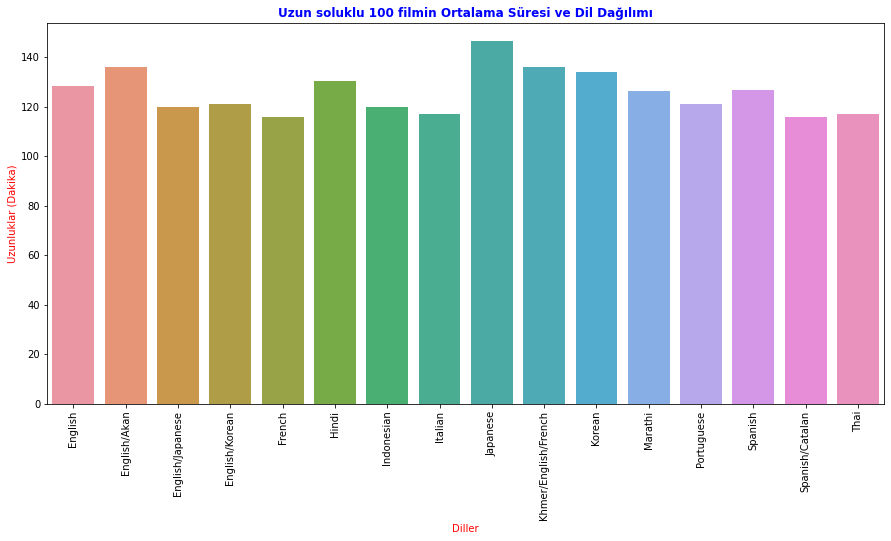

In [8]:
plt.figure(figsize=(15,7))
sns.barplot(x=lang_film.index, y=lang_film.values)
plt.title("Uzun soluklu 100 filmin Ortalama Süresi ve Dil Dağılımı",weight='bold',color="blue")
plt.ylabel("Uzunluklar (Dakika)",color="red")
plt.xlabel("Diller",color="red")
plt.xticks(rotation=90)  

# 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

In [9]:
df["Date"] = pd.to_datetime(df.Premiere)
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["day_of_week"] = df["Date"].dt.dayofweek
df["Year_Month"] = df["Date"].dt.strftime("%Y-%m")

In [11]:
#Verilen Tarihler Arasından Belgesel Türündeki Verinin çekilmesi
doc_film = df[(df['Date'] > '2019-01-01') & (df['Date'] <= '2020-06-30') & (df["Genre"]=="Documentary")]

Text(0.5, 1.0, '2019 Ocak 2020 Haziran Arası Documentary Türünde çekilen filmlerin IMDB Puanları')

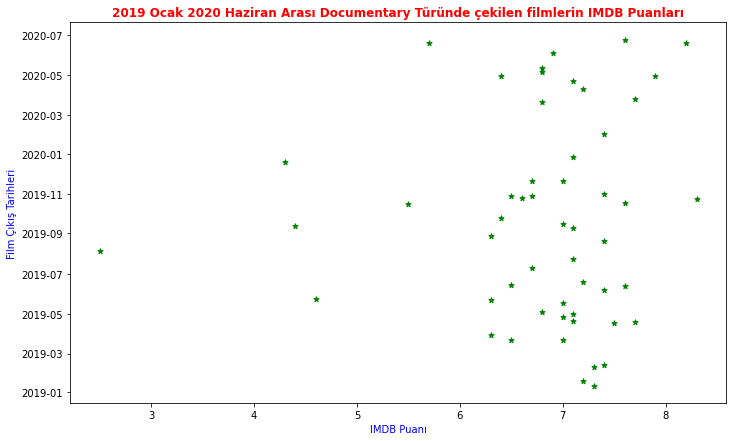

In [12]:
fig =plt.figure(figsize = (40,7))
first_plot = fig.add_subplot(1,3,1)
first_plot.scatter(doc_film["IMDB Score"],doc_film["Date"],label= "stars", color= "green", 
            marker= "*", s=30)
plt.xlabel('IMDB Puanı',color="blue")
plt.ylabel('Film Çıkış Tarihleri',color="blue")
first_plot.set_title("2019 Ocak 2020 Haziran Arası Documentary Türünde çekilen filmlerin IMDB Puanları",color="red",weight='bold')

# İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [15]:
#İngilizce Olan filmleri listeledik
language_eng=df[(df["Language"] == "English")]

In [16]:
#IMDB puanına göre sıralayıp en yüksek ımdb puanına sahip filmi seçtik
language_eng[["IMDB Score", "Title", "Genre", "Language"]].sort_values(["IMDB Score"], ascending=False).head(1)

,IMDB Score,Title,Genre,Language
583,9.0,David Attenborough: A Life on Our Planet,Documentary,English
